## Library

In [ ]:
# import the library

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import math
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras import layers

In [ ]:
# remove dataset in a new run (if already run the 'git clone' code only) 
# ignore if no CycleMe folder in Colab Files

try:
    !rm -rf '/content/CycleMe'
    print("% s removed successfully")
except OSError as error:
    print(error)
    print("File is empty, can not be removed!")

% s removed successfully


## Data Gathering

In [ ]:
# clone from github

!git clone https://github.com/notRobot200/CycleMe.git

Cloning into 'CycleMe'...
remote: Enumerating objects: 6630, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 6630 (delta 0), reused 0 (delta 0), pack-reused 6629
Receiving objects: 100% (6630/6630), 240.74 MiB | 41.34 MiB/s, done.
Resolving deltas: 100% (95/95), done.
Updating files: 100% (8570/8570), done.


In [ ]:
# specify the directory

dir = '/content/CycleMe/CycleMeDataset'

In [ ]:
# display the number of images on each class

classes = ['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Paper and Cardboard', 'Plastic', 'Styrofoam', 'Textiles']
numData = 0
for label in classes:
    directory = os.path.join(dir, label)
    lengthDir = len(os.listdir(directory))
    print("Images of label \"" + label + "\":\t",lengthDir )
    numData = numData + lengthDir
print('Total images : \t',numData)

Images of label "Aluminium":	 607
Images of label "Carton":	 336
Images of label "Glass":	 597
Images of label "Organic Waste":	 562
Images of label "Paper and Cardboard":	 602
Images of label "Plastic":	 596
Images of label "Styrofoam":	 395
Images of label "Textiles":	 585
Total images : 	 4280


In [ ]:
# investigating unsupported image file

from pathlib import Path
import imghdr

DIR = '/content/CycleMe/CycleMeDataset'
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(DIR).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/content/CycleMe/CycleMeDataset/Glass/glass (11).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (10).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (356).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (14).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (7).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (13).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (336).jpg is not an image
/content/CycleMe/CycleMeDataset/Aluminium/alum (290).jpg is not an image
/content/CycleMe/CycleMeDataset/Aluminium/alum (271).jpg is not an image
/content/CycleMe/CycleMeDataset/Plastic/plast (12).jpg is not an image
/content/CycleMe/CycleMeDataset/Organic Waste/org (183).jpg is not an image
/content/CycleMe/CycleMeDataset/Organic Waste/org (22).jpg is not an image
/content/CycleMe/CycleMeDataset/Styrofoam/STYROFOAM (10).jpg is a webp, not accepted by TensorFlow
/content/CycleMe/CycleMeDataset/Styrofoam/STYROFO

In [ ]:
# delete unsupported image file

img_link=list(Path(DIR).glob(r'**/*.jpg'))
count_num=0
for lnk in img_link:
    binary_img=open(lnk,'rb')
    find_img=tf.compat.as_bytes('JFIF') in binary_img.peek(10) #The JFIF is a JPEG File Interchange Format (JFIF). It is a standard which we gauge if an image is corrupt or substandard
    if not find_img:
        count_num+=1
        os.remove(str(lnk))
print('Total %d pcs image delete from Dataset' % count_num)

Total 79 pcs image delete from Dataset


In [ ]:
# images per class after cleaning

numData = 0
for label in classes:
    directory = os.path.join(dir, label)
    lengthDir = len(os.listdir(directory))
    print("Images of label \"" + label + "\":\t",lengthDir )
    numData = numData + lengthDir
print('Total images : \t',numData)

Images of label "Aluminium":	 598
Images of label "Carton":	 323
Images of label "Glass":	 585
Images of label "Organic Waste":	 542
Images of label "Paper and Cardboard":	 601
Images of label "Plastic":	 593
Images of label "Styrofoam":	 385
Images of label "Textiles":	 574
Total images : 	 4201


In [ ]:
# load image shape of first example in each class

for label in classes:
    directory = os.path.join(dir, label)
    sample_image  = load_img(f"{os.path.join(directory, os.listdir(directory)[0])}")
    # Convert the image into its numpy array representation
    sample_array = img_to_array(sample_image)
    print("Class: ", label, "\t\t", f"Each image has shape: {sample_array.shape}")

Class:  Aluminium 		 Each image has shape: (259, 194, 3)
Class:  Carton 		 Each image has shape: (183, 275, 3)
Class:  Glass 		 Each image has shape: (177, 285, 3)
Class:  Organic Waste 		 Each image has shape: (181, 279, 3)
Class:  Paper and Cardboard 		 Each image has shape: (384, 512, 3)
Class:  Plastic 		 Each image has shape: (384, 512, 3)
Class:  Styrofoam 		 Each image has shape: (225, 225, 3)
Class:  Textiles 		 Each image has shape: (233, 216, 3)


In [ ]:
# load data
# Generate batches of tensor image data with real-time data augmentation.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     validation_split=0.1)

validation_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                        validation_split=0.1)


train = train_datagen.flow_from_directory(dir, 
                                          batch_size=128, 
                                          subset="training",
                                          seed=1, 
                                          target_size=(256, 256))

test = validation_datagen.flow_from_directory(dir, 
                                              batch_size=128,
                                              subset="validation", 
                                              seed=1, 
                                              target_size=(256, 256))

'''
# split data
train = tf.keras.preprocessing.image_dataset_from_directory(dir, validation_split=0.1, subset="training", seed=42, batch_size=128, smart_resize=True, image_size=(256, 256))
test = tf.keras.preprocessing.image_dataset_from_directory(dir, validation_split=0.1, subset="validation", seed=42, batch_size=128, smart_resize=True, image_size=(256, 256))

# define the class
classes = train.class_names
numClasses = len(train.class_names)
print(classes)

# to find a good allocation of its CPU budget across all parameters 
AUTOTUNE = tf.data.AUTOTUNE
train = train.prefetch(buffer_size=AUTOTUNE)
test = train.prefetch(buffer_size=AUTOTUNE)
'''

Found 3784 images belonging to 8 classes.
Found 417 images belonging to 8 classes.


'\n# split data\ntrain = tf.keras.preprocessing.image_dataset_from_directory(dir, validation_split=0.1, subset="training", seed=42, batch_size=128, smart_resize=True, image_size=(256, 256))\ntest = tf.keras.preprocessing.image_dataset_from_directory(dir, validation_split=0.1, subset="validation", seed=42, batch_size=128, smart_resize=True, image_size=(256, 256))\n\n# define the class\nclasses = train.class_names\nnumClasses = len(train.class_names)\nprint(classes)\n\n# to find a good allocation of its CPU budget across all parameters \nAUTOTUNE = tf.data.AUTOTUNE\ntrain = train.prefetch(buffer_size=AUTOTUNE)\ntest = train.prefetch(buffer_size=AUTOTUNE)\n'

## Create The Model

In [ ]:
# import MobileNet

from tensorflow.keras.applications import MobileNet

In [ ]:
# download the weights

!wget --no-check-certificate \
    https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf_no_top.h5  \
    -O /tmp/mobilenet_1_0_224_tf_no_top.h5

--2023-05-27 07:02:28--  https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf_no_top.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.251.163.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17225924 (16M) [application/x-hdf]
Saving to: ‘/tmp/mobilenet_1_0_224_tf_no_top.h5’

/tmp/mobilenet_1_0_ 100%[===================>]  16.43M  --.-KB/s    in 0.09s   

2023-05-27 07:02:28 (189 MB/s) - ‘/tmp/mobilenet_1_0_224_tf_no_top.h5’ saved [17225924/17225924]



In [ ]:
# specify the weight

local_weights_file = '/tmp/mobilenet_1_0_224_tf_no_top.h5'

In [ ]:
# create pre trained model

pre_trained_model = MobileNet(input_shape = (256, 256, 3),
                                  include_top = False, 
                                  weights = 'imagenet',
                                  classes=8)

pre_trained_model.load_weights(local_weights_file)

# make the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers[:-3]:
  layer.trainable = False

# print the model summary
pre_trained_model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 128, 128, 32

In [ ]:
# display total parameter in the model

total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 3,228,864 total parameters in this model.
There are 1,050,624 trainable parameters in this model.


In [ ]:
# specify the last_output layer

last_desired_layer = pre_trained_model.layers[-1]
print('last layer output shape: ', last_desired_layer.output_shape)
last_output = last_desired_layer.output
print('last layer output: ', last_output)

last layer output shape:  (None, 8, 8, 1024)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 1024), dtype=tf.float32, name=None), name='conv_pw_13_relu/Relu6:0', description="created by layer 'conv_pw_13_relu'")


In [ ]:
# create_final_model

def create_final_model(pre_trained_model, last_output):

  x = layers.Dropout(0.4)(last_output) 
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.BatchNormalization()(x) 
  x = layers.Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01))(x)
  x = layers.Dropout(0.3)(x)  
  x = layers.Dense(8, activation='softmax')(x)        

  # create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # compile the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
                loss = 'categorical_crossentropy', #sparse_categorical_crossentropy return error
                metrics = ['accuracy'])
  
  return model

In [ ]:
# save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 3,497,416 total parameters in this model.
There are 1,317,128 trainable parameters in this model.


In [ ]:
epochs = 15
lrCallback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 30))
stepDecay = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.1 * 0.1**math.floor(epoch / 6))
history = model.fit(train,
                    validation_data = test,
                    epochs = epochs,
                    verbose = 2,
                    callbacks=[])

Epoch 1/15
30/30 - 86s - loss: 62.2330 - accuracy: 0.7093 - val_loss: 35.9507 - val_accuracy: 0.4556 - 86s/epoch - 3s/step
Epoch 2/15
30/30 - 71s - loss: 18.7533 - accuracy: 0.8446 - val_loss: 6.7162 - val_accuracy: 0.5755 - 71s/epoch - 2s/step
Epoch 3/15
30/30 - 72s - loss: 3.5679 - accuracy: 0.8240 - val_loss: 2.2549 - val_accuracy: 0.7362 - 72s/epoch - 2s/step
Epoch 4/15
30/30 - 70s - loss: 1.9444 - accuracy: 0.8245 - val_loss: 1.6481 - val_accuracy: 0.8058 - 70s/epoch - 2s/step
Epoch 5/15
30/30 - 71s - loss: 1.6525 - accuracy: 0.8433 - val_loss: 1.7319 - val_accuracy: 0.7338 - 71s/epoch - 2s/step
Epoch 6/15
30/30 - 72s - loss: 1.5378 - accuracy: 0.8668 - val_loss: 1.7344 - val_accuracy: 0.6859 - 72s/epoch - 2s/step
Epoch 7/15
30/30 - 70s - loss: 1.4529 - accuracy: 0.8782 - val_loss: 1.4945 - val_accuracy: 0.8106 - 70s/epoch - 2s/step
Epoch 8/15
30/30 - 72s - loss: 1.3580 - accuracy: 0.8911 - val_loss: 1.4455 - val_accuracy: 0.7866 - 72s/epoch - 2s/step
Epoch 9/15
30/30 - 71s - loss

In [ ]:
model.save("/content/modelMobileNet.h5")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 128, 128, 32)     128       
 ation)                                                      

## Model Evaluation

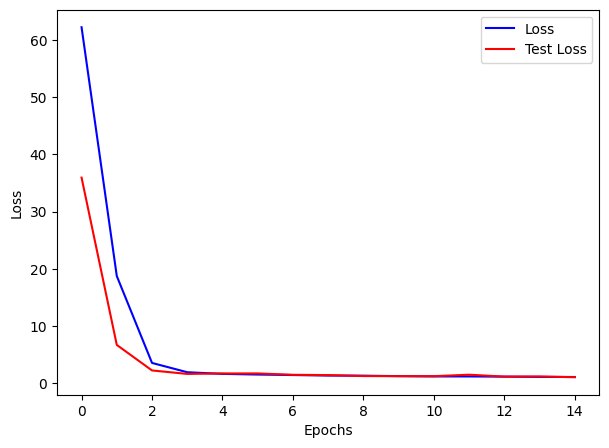

In [ ]:
# loss plot

plt.figure(figsize=(7,5)) # (x,y)
plt.plot(range(0, epochs), history.history["loss"], color="b", label="Loss")
plt.plot(range(0, epochs), history.history["val_loss"], color="r", label="Test Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

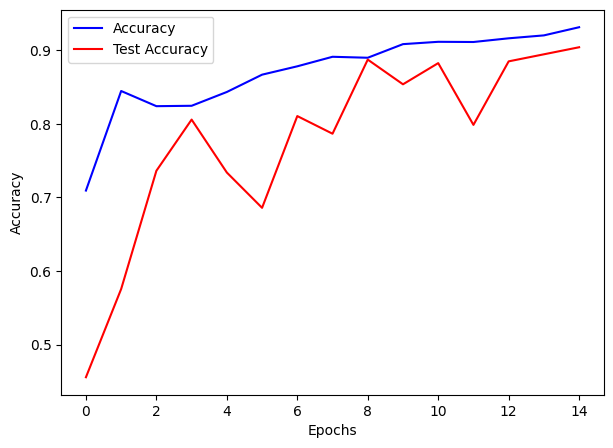

In [ ]:
# accuracy plot

plt.figure(figsize=(7,5)) # (x,y)
plt.plot(range(0, epochs), history.history["accuracy"], color="b", label="Accuracy")
plt.plot(range(0, epochs), history.history["val_accuracy"], color="r", label="Test Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Text(0, 0.5, 'Loss')

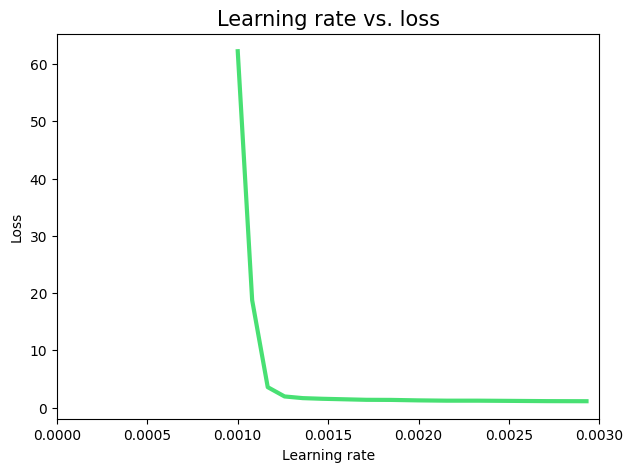

In [ ]:
# learning rate vs. loss plot

plt.figure(figsize=(7,5)) # (x,y)
plt.xlim([0, 0.003])
learning_rates = 1e-3 * (10 ** (np.arange(epochs) / 30))
plt.plot(learning_rates, history.history['loss'], lw=3, color='#48e073')
plt.title('Learning rate vs. loss', size=15)
plt.xlabel('Learning rate')
plt.ylabel('Loss')

1/1 [==============================] - 1s 742ms/step
[8.5248268e-01 4.3894668e+00 7.2276920e-02 2.4337378e-01 5.5555186e+00
 1.4861102e+01 1.5425339e+00 7.2483246e+01] 
 ['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Paper and Cardboard', 'Plastic', 'Styrofoam', 'Textiles']
Prediction:  Textiles 72.48324751853943%


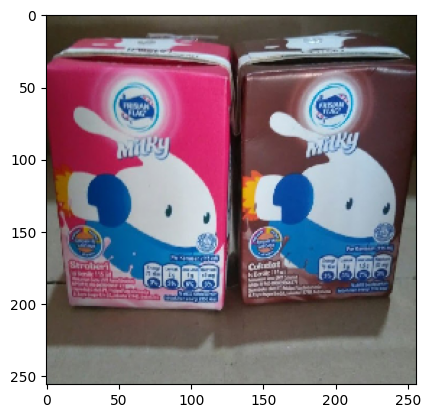

In [ ]:
# try the image prediction

import requests

# plastic 
# img_data = requests.get("https://images.unsplash.com/photo-1591872203534-278fc084969e?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1064&q=80").content

# styrofoam 
# img_data = requests.get('https://www.asiaone.com/sites/default/files/original_images/May2016/20160510-NAFA-STYROFOAM-BOXES.jpg').content

# carton 
img_data = requests.get('https://lh6.googleusercontent.com/proxy/F-ZBe3pl0OfndrhadlTVO08-thBk3y0zEv6q90T1KhOV0a5YLsRSwvhNF-Dsgb-qzJwuKel6aJD5Ptpxj1UfbZvrN0g5mfVCiq9MlNdqyZaunE5jeAnuJEVoB8d8RB4MLAgCtCZp2vfjdooB_NMpEcLpThhNRw-GUCm3hEQgt9o7XbH6FUAONznkY1L7QwkLkrhnOuxtZPUxRYU=w1200-h630-p-k-no-nu').content

with open('img.jpg', 'wb') as handler:
    handler.write(img_data)

path = "/content/img.jpg"

img = tf.keras.preprocessing.image.load_img(path, target_size=(256, 256))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)

plt.imshow(img)
print(predictions[0]*100, "\n", classes)
print("Prediction: ", classes[np.argmax(predictions)], f"{predictions[0][np.argmax(predictions)]*100}%")

In [ ]:
# move file txt to outside the dataset folder

file_source2 = '/content/CycleMe/CycleMeDataset/'
file_destination2 = '/content/CycleMe/'

get_files2 = os.listdir(file_source2)
shutil.move(file_source2 + 'problem_1.txt', file_destination2)

'/content/CycleMe/problem_1.txt'

In [ ]:
# create function to display confusion matrix plot

def plot_confusion_matrix(cm, target_names, cmap=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=80)
        plt.yticks(tick_marks, target_names)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}%; misclass={:0.4f}%'.format(accuracy, misclass))
    plt.show()

plt.figure(figsize=(10, 10))
true = []
predictions = []

"""
for images, labels in test_dataset.take(50):
  pred = model.predict(images)
  for i in range(32):
    try:
      ax = plt.subplot(4, 8, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      #print(classes[np.argmax(pred[i])], 100 * np.max(pred[i]), "real = " + str(classes[labels[i]]))

      true.append(labels[i])
      predictions.append(np.argmax(pred[i]))

      plt.title(classes[labels[i]])
      plt.axis("off")
    except:
      print()

"""

for i in os.listdir(DIR):
  folderPath = os.path.join(DIR, i)
  for j in os.listdir(folderPath)[:550]:
    fullPath = os.path.join(folderPath, j)
    try:
      img = tf.keras.preprocessing.image.load_img(fullPath, target_size=(256, 256))
      img_array = tf.keras.preprocessing.image.img_to_array(img)
      img_array = tf.expand_dims(img_array, 0) 

      preds = model.predict(img_array)
      true.append(classes.index(i))
      predictions.append(np.argmax(preds))
    except:
      print("Error on image:", fullPath)

1/1 [==============================] - 0s 29ms/step


<Figure size 1000x1000 with 0 Axes>

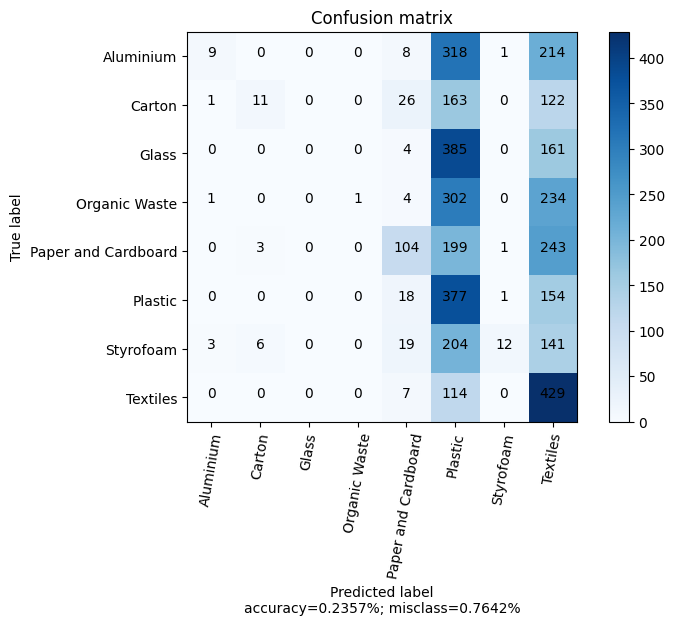

In [ ]:
# display confusion matrix plot

plot_confusion_matrix(tf.math.confusion_matrix(true, predictions), classes)